In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

In [55]:
df_train=pd.read_csv('Train.csv',delimiter = ',')
df_train

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.00,2.0,65.0,50836.00,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.00,21.0,63.0,23226.00,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.00,7.0,1.0,27036.00,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.00,21.0,83.0,43037.00,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.00,8.0,32.0,32044.00,Y,12780.44,96408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,current,F,53,653,10443.76,1218.85,7252.24,3873.00,6633.00,...,8.0,6936.0,487751.19,42625.50,14.0,8.0,82851.00,Y,78966.76,4263.0
14996,10376,current,M,44,535,29890.33,6308.00,16025.50,7610.00,2213.08,...,20.0,202639.0,8666.01,34987.55,11.0,18.0,118110.47,Y,4762.10,11019.0
14997,2181,current,M,37,464,4148.98,948.74,19360.26,494.00,44363.91,...,5.0,44421.0,97896.48,261432.00,4.0,73.0,49545.00,Y,2877.33,404227.0
14998,18417,current,M,220,536,115574.00,7191.05,44341.13,34817.20,20679.00,...,25.0,22409.0,22693.92,33025.29,3.0,80.0,16130.00,Y,13006.84,28813.0


In [56]:

df_train=df_train.drop(columns=df_train[['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed']])

In [63]:
df1=df_train.loc[:,df_train.dtypes==np.object]

df2=df_train.loc[:,df_train.dtypes==np.number]


In [58]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
iqr=q3-q1
ll=q1-(3*iqr)
ul=q3+(3*iqr)

In [59]:
num=list()
for a in df2.columns:
    if a in ll.index:
        num.append(a)

In [60]:
df2=df2[num]

In [61]:
df = df2[~((df2 < (q1 - 1.5 * iqr)) |(df2 > (q3 + 1.5 * iqr))).any(axis=1)]
df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
1,18941.62,966.00,20672.00,287.00,4217.000,885.00,1.0,7.0,13.0,3.0,...,2.0,78.0,23948.00,42119.05,76206.00,21.0,63.0,23226.00,13043.34,10173.0
15,4375.13,1035.00,14183.42,12489.00,10521.500,5124.00,24.0,27.0,79.0,8.0,...,2.0,12.0,19669.00,39971.35,461.79,3.0,83.0,10040.39,288.38,10069.0
75,2080.00,240.00,1052.30,2047.00,1069.000,1023.00,43.0,85.0,48.0,20.0,...,10.0,9.0,23349.00,15350.00,36734.26,5.0,21.0,24821.00,2183.10,27930.0
126,2606.15,7222.00,6406.00,10061.34,2484.000,5246.00,8.0,23.0,47.0,48.0,...,9.0,6.0,35241.00,8892.20,23907.00,13.0,124.0,15656.00,4625.45,14474.0
164,23657.84,6463.95,283.65,9272.15,6850.500,15647.48,60.0,2.0,47.0,8.0,...,2.0,78.0,19821.00,67181.60,365.76,4.0,12.0,18600.00,20586.84,966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14974,6174.68,3822.00,9866.14,5393.67,5663.225,3327.00,12.0,50.0,4.0,8.0,...,1.0,13.0,27034.09,78592.91,102657.50,40.0,58.0,30107.00,2307.10,7705.0
14981,27105.74,933.20,4717.00,3876.00,9883.960,1204.12,25.0,18.0,47.0,7.0,...,2.0,4.0,24320.00,68356.73,140120.00,6.0,83.0,35485.00,2909.80,3336.0
14983,1891.58,255.00,3001.95,287.00,13459.965,3176.00,100.0,77.0,38.0,18.0,...,1.0,20.0,16000.00,62746.00,51494.00,4.0,104.0,17003.00,1360.05,10064.0
14989,3844.50,7684.00,4077.09,3337.94,5848.000,1981.00,8.0,10.0,74.0,3.0,...,2.0,35.0,16187.00,793.00,42396.00,41.0,36.0,13070.00,2646.18,12310.0


In [62]:
df_train = df_train.dropna(how ='all') 
df_train.drop(df[df.columns].index, inplace = True)

In [64]:
df2

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,24893.00,378.00,10288.00,29664.00,16291.400,11432.00,2.0,26.0,10.0,48.0,...,2.0,40.0,24563.0,30051.32,12761.00,2.0,65.0,50836.00,1674.09,20014.0
2,5678.87,2724.00,1964.50,3933.11,23956.250,5168.00,43.0,32.0,102.0,4.0,...,2.0,82.0,10752.0,58373.25,75283.00,7.0,1.0,27036.00,25375.27,16095.0
3,30489.50,1236.00,12609.88,9138.14,17521.000,13650.30,53.0,1.0,50.0,1.0,...,23.0,38.0,12607.0,69851.51,68708.00,21.0,83.0,43037.00,3544.33,7707.0
4,7441.40,6906.04,4364.00,1939.00,2121.000,6829.18,67.0,47.0,82.0,54.0,...,24.0,50.0,25213.0,10071.00,80140.00,8.0,32.0,32044.00,12780.44,96408.0
5,2328.22,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7.0,59.0,25.0,...,43.0,2.0,21440.0,52292.68,199925.50,2.0,35.0,17284.00,5026.50,130263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.000,10107.00,3.0,36.0,3.0,44.0,...,1.0,8.0,6936.0,487751.19,42625.50,14.0,8.0,82851.00,78966.76,4263.0
14996,29890.33,6308.00,16025.50,7610.00,2213.080,841.60,1.0,34.0,4.0,7.0,...,4.0,20.0,202639.0,8666.01,34987.55,11.0,18.0,118110.47,4762.10,11019.0
14997,4148.98,948.74,19360.26,494.00,44363.910,1801.77,57.0,23.0,61.0,24.0,...,43.0,5.0,44421.0,97896.48,261432.00,4.0,73.0,49545.00,2877.33,404227.0
14998,115574.00,7191.05,44341.13,34817.20,20679.000,1010.00,7.0,128.0,44.0,3.0,...,3.0,25.0,22409.0,22693.92,33025.29,3.0,80.0,16130.00,13006.84,28813.0


In [65]:
df_train['investment_4'].min()


-12179.0

In [66]:
df2['investment_4']=df2['investment_4'].add(12179)


cr_log=df2.applymap(lambda x: np.log1p(x))
cr_log1=cr_log.iloc[:,cr_log.columns!='cc_cons']
cr_log2=cr_log['cc_cons']

C:\Users\DAZZABHI\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df2['investment_4'].min()

0.0

In [68]:

from sklearn.preprocessing import StandardScaler
mm_scaler = StandardScaler()
cr_log1[cr_log1.columns] =mm_scaler.fit_transform(cr_log1[cr_log1.columns])

C:\Users\DAZZABHI\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DAZZABHI\Miniconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\DAZZABHI\Miniconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [69]:
corr=df2.corr()
#sns.heatmap(data=corr,annot=True)
#df2=df2.drop(columns=df2[['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed']])

In [70]:
S=pd.get_dummies(df1[['account_type', 'gender']]).astype('float64')


In [71]:
df3=pd.concat([S,cr_log1,cr_log2],axis=1).astype('float64')

            

In [72]:
df3

,account_type_current,account_type_saving,gender_F,gender_M,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,1.0,0.0,0.0,1.0,0.806590,-1.764070,0.171898,1.673967,0.788781,0.982289,...,-0.722459,0.436523,-0.197173,-0.343088,-0.881881,-1.212141,0.730640,0.447501,-0.453558,9.904237
2,1.0,0.0,0.0,1.0,-0.455286,-0.253442,-1.196486,0.060717,1.115626,0.361204,...,-0.722459,1.106652,-0.882366,0.249084,0.451576,-0.315305,-2.395342,-0.029727,1.184041,9.686326
3,1.0,0.0,1.0,0.0,0.979760,-0.858232,0.340110,0.733781,0.850458,1.121032,...,1.119897,0.389004,-0.750364,0.409192,0.382914,0.609668,0.946246,0.321628,-0.001815,8.950014
4,1.0,0.0,0.0,1.0,-0.224494,0.458782,-0.536922,-0.503838,-0.939096,0.579235,...,1.156065,0.643902,-0.175510,-1.318110,0.498550,-0.207608,0.110946,0.098710,0.770826,11.476355
5,1.0,0.0,0.0,1.0,-1.216489,-0.661887,0.720544,-0.996451,0.507179,-1.286759,...,1.656924,-2.048150,-0.309957,0.150974,1.185387,-1.212141,0.188736,-0.367848,0.208638,11.777318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.0,0.0,1.0,0.0,0.064915,-0.868923,-0.117122,0.048422,0.027141,0.885916,...,-1.081695,-1.004274,-1.245920,2.142554,0.024226,0.259473,-1.050652,0.816658,1.868029,8.357963
14996,1.0,0.0,0.0,1.0,0.962812,0.389430,0.538245,0.587673,-0.903088,-1.058017,...,-0.269874,-0.199192,1.553056,-1.452107,-0.124128,0.055438,-0.382620,1.084645,0.176088,9.307467
14997,1.0,0.0,0.0,1.0,-0.723275,-1.060592,0.694508,-1.594534,1.637953,-0.462937,...,1.656924,-1.389538,0.294227,0.710243,1.386915,-0.745060,0.832926,0.428059,-0.127391,12.909734
14998,1.0,0.0,0.0,1.0,2.117647,0.489746,1.379524,1.801869,0.990928,-0.915462,...,-0.467576,0.003741,-0.273294,-0.593536,-0.167493,-0.949095,0.913732,-0.420071,0.781405,10.268617


In [73]:
X=df3.iloc[:,df3.columns!='cc_cons']
y=df3['cc_cons']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [76]:
#def model():
    #lasso=PCA(0.95)
lasso=Lasso()
lasso.fit(X,y)
y_pred=lasso.predict(X_test)
    #print(np.sqrt(mean_squared_error(y_test,y_pred)))
    #y_pred
    #print(lasso.n_components_)

In [27]:
from sklearn import linear_model
#def Rfe_linear_model():
model=linear_model.SGDRegressor(max_iter=2000, penalty='l2',alpha=0.0001,tol=1e-3)
model.fit(X,y)
y_pred=model.predict(X_test)
    #return y_pred

In [77]:
y_pred

array([9.69288887, 9.69288887, 9.69288887, ..., 9.69288887, 9.69288887,
       9.69288887])

In [32]:
from sklearn.ensemble import RandomForestRegressor
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)



SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [33]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

21

In [34]:
n_estimators=len(selected_feat)

In [30]:
y_pred=sel.predict(X_test)
y_pred

AttributeError: 'SelectFromModel' object has no attribute 'predict'

In [29]:
sel1=RandomForestRegressor(n_estimators,random_state=40)
sel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=22, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [102]:


rmsle(y_test,y_pred)

7.334810769866263

In [103]:
y_pred=np.expm1(y_pred)
y_pred

C:\Users\DAZZABHI\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


array([inf, inf, inf, ..., inf, inf, inf])

ValueError: supplied range of [-inf, -inf] is not finite

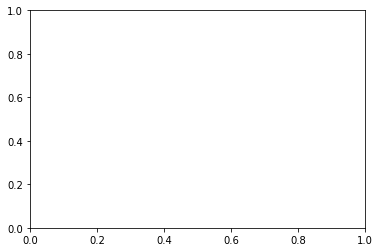

In [107]:
import matplotlib.pyplot as plt
resid=y_test-y_pred
plt.hist(resid)

In [87]:
test_data=pd.read_csv('test.csv')

In [88]:
test_data=test_data.drop(['loan_enq','region_code','age','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],axis=1)
#df_test_predict=test_data.drop(['ID'],axis=1)

In [89]:
df_test_categorical=test_data.loc[:,test_data.dtypes==np.object]
df_test_numerical=test_data.loc[:,test_data.dtypes==np.number]
df_test_numerical


,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,...,41755.00,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,1170.49
1,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,...,130299.00,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,16447.45
2,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,...,40422.00,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,2622.28
3,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,...,48148.00,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,340.79
4,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,...,25926.00,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,2812.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1.0,4.0,1.0,...,45461.00,35.0,11.0,32944.0,105488.53,125470.83,21.0,50.0,58037.00,7870.88
4996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56.0,50.0,18.0,...,85422.00,5.0,8.0,8850.0,77112.66,86559.00,62.0,38.0,24110.00,3668.30
4997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77.0,1.0,1.0,...,68985.86,10.0,108.0,35819.0,57192.48,80627.00,2.0,18.0,1769.00,5450.34
4998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1.0,4.0,1.0,...,13558.00,11.0,12.0,39083.0,82039.00,24332.00,117.0,64.0,37255.00,59.29


In [90]:
df_test_numerical['investment_4']=df_test_numerical['investment_4'].add(12179)
from scipy.stats import skew
#print(skew(df_test_numerical))
cr_log6=df_test_numerical.applymap(lambda x: np.log(x+1))

C:\Users\DAZZABHI\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
from sklearn.preprocessing import StandardScaler
mm_scaler1 = StandardScaler()
cr_log6[cr_log6.columns] =mm_scaler.fit_transform(cr_log6[cr_log6.columns])


In [92]:
S1=pd.get_dummies(df_test_categorical[['account_type', 'gender']]).astype('float64')
S1

,account_type_current,account_type_saving,gender_F,gender_M
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
4995,1.0,0.0,0.0,1.0
4996,1.0,0.0,0.0,1.0
4997,1.0,0.0,0.0,1.0
4998,1.0,0.0,0.0,1.0


In [93]:
df_test=pd.concat([S1,cr_log6],axis=1).astype('float64')

df_test

,account_type_current,account_type_saving,gender_F,gender_M,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,1.0,0.0,0.0,1.0,-1.026399,-0.793644,-0.225076,-1.308955,0.319937,1.254853,...,-0.049804,1.199707,-0.196002,-0.951731,-0.313253,-0.203630,-0.941924,-0.705112,-0.031637,-0.663860
1,1.0,0.0,0.0,1.0,0.986804,-0.610187,-1.323080,-0.289729,0.472801,-0.959368,...,0.889748,1.712515,0.444209,-0.501376,-0.975409,-0.681928,-0.423090,0.294181,-0.587246,0.964610
2,1.0,0.0,0.0,1.0,-0.375163,0.405135,-0.919257,-1.211036,-1.845165,0.204619,...,-0.076590,1.691660,0.319762,0.119095,-0.258293,-0.150826,-0.566007,-0.938382,-0.529159,-0.166959
3,1.0,0.0,0.0,1.0,-1.268648,1.231012,1.237068,-2.409420,-0.329623,1.466006,...,0.067812,-0.462666,-1.394764,0.922842,0.668624,0.740809,0.638592,-2.985624,0.724295,-1.423148
4,1.0,0.0,0.0,1.0,-0.892543,-0.023735,-0.785809,-0.217616,-0.528033,0.374893,...,-0.443260,2.146563,1.034767,-0.096009,-0.728398,0.007947,-0.423090,0.200505,0.329579,-0.123875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,0.0,1.0,-0.592671,0.378813,-0.243463,0.169527,1.610876,-0.420128,...,0.020402,1.530482,-0.731495,0.038040,0.773700,0.843948,0.638592,0.510186,0.562067,0.510372
4996,1.0,0.0,0.0,1.0,-0.529974,-0.199826,0.896466,0.395171,-1.527284,-0.916703,...,0.541152,-0.094860,-1.006777,-1.030459,0.499028,0.564030,1.614014,0.271671,-0.085757,0.039886
4997,1.0,0.0,0.0,1.0,-0.894338,-0.182147,-0.075213,0.944404,-0.356025,-0.648833,...,0.364718,0.454978,1.379838,0.106059,0.237059,0.510502,-1.208642,-0.367705,-2.011825,0.283889
4998,1.0,0.0,0.0,1.0,0.276786,0.221242,0.356795,-1.992320,0.748083,1.967380,...,-0.978455,0.533908,-0.654903,0.176956,0.553314,-0.392802,2.195831,0.725849,0.235154,-2.492601


In [94]:
lasso1=Lasso()
lasso1.fit(X_train,y_train)
#df_test = df_test.values.reshape((3000,1*1))
y_pre=lasso1.predict(df_test)

#print(np.sqrt(mean_squared_error(y_test,y_pred)))

In [39]:
#def Rfe_linear_model():
model1=linear_model.SGDRegressor(max_iter=2000, penalty='l2',alpha=0.0001,tol=1e-3)
model1.fit(X_train,y_train)
y_pre=model1.predict(df_test)
    #return y_pred

In [60]:
sel2=RandomForestRegressor(n_estimators,random_state=40)
sel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=21, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [61]:
y_pre=sel2.predict(df_test)

In [ ]:
n_estimators=len(selected_feat)

In [96]:
back = np.expm1(y_pre)
predictions = np.clip(y_pre,y_pre.min(),y_pre.max())
#predictions
back

array([16061.4835974, 16061.4835974, 16061.4835974, ..., 16061.4835974,
       16061.4835974, 16061.4835974])

In [97]:
def rmsle(y, y_pred):
    sum=0.0
    for x,y in zip(y,y_pred):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(y_pred))**0.5

In [98]:
rmsle(y,y_pre)

0.16049725391567504

In [99]:
to_submit = pd.DataFrame({'ID': test_data['ID'], 'cc_cons': back} )

In [100]:
to_submit.min()

ID             0.000000
cc_cons    16061.483597
dtype: float64

In [101]:
to_submit.to_csv('first_submission2.csv', index=False)

In [50]:
to_submit

,ID,cc_cons
0,17591,14764.570133
1,13541,13090.163768
2,13431,13388.894388
3,8687,23123.582241
4,14727,15393.797930
...,...,...
4995,12512,13654.665089
4996,14224,21038.174368
4997,18740,10989.015245
4998,18134,17722.933975


In [51]:
to_submit.min()

ID            0.000000
cc_cons    8867.282821
dtype: float64